In [28]:
from qiskit import *
import numpy as np
from qiskit_aer import AerSimulator

In [29]:
pi = np.pi

In [30]:
def expectation(counts):
    total = sum(counts.values())
    e = 0
    for outcome, count in counts.items():
        a, b = int(outcome[1]), int(outcome[0])  # Qiskit: bit 0 é o último
        value = 1 if a == b else -1
        e += value * count / total
    return e

In [31]:
Bell = QuantumCircuit(2)
Bell.h(0)
Bell.cx(0,1)
Bell.barrier()
"""Bell.ry(-pi/2,0)
Bell.ry(-pi/2,1)"""
Bell.draw('mpl')

import numpy as np

# Matrizes de Pauli
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

# Dicionário de portas
pauli_dict = {
    'I': I,
    'X': X,
    'Y': Y,
    'Z': Z
}

# Lista de combinações
combined = ['ZX','ZY','ZZ',
            'XX','XY','XZ',
            'YX','YY','YZ']

# Produto de Kronecker
tensor_products = {}

for label in combined:
    A = pauli_dict[label[0]]
    B = pauli_dict[label[1]]
    kron_product = np.kron(A, B)
    tensor_products[label] = kron_product
    print(f"{label} =\n{kron_product}\n")


ZX =
[[ 0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]]

ZY =
[[ 0.+0.j  0.-1.j  0.+0.j  0.-0.j]
 [ 0.+1.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.-0.j -0.+0.j  0.+1.j]
 [ 0.+0.j  0.+0.j -0.-1.j -0.+0.j]]

ZZ =
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j -0.+0.j]
 [ 0.+0.j -0.+0.j -0.+0.j  1.-0.j]]

XX =
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]

XY =
[[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]

XZ =
[[ 0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j -0.+0.j  0.+0.j -1.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j -0.+0.j]]

YX =
[[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]

YY =
[[ 0.+0.j  0.-

In [32]:
backend = AerSimulator()

In [33]:
def tomography(circuit, target_1, target_2, shots):
    from qiskit import ClassicalRegister, transpile

    combined = ['IZ', 'IX', 'IY',
                'ZI', 'XI', 'YI',
                'ZX','ZY','ZZ',
                'XX','XY','XZ',
                'YX','YY','YZ']

    result = {}

    for base in combined:
        circ = circuit.copy()
        creg = ClassicalRegister(2)
        circ.add_register(creg)

        # Para o primeiro qubit
        if base[0] == 'X':
            circ.h(target_1)
        elif base[0] == 'Y':
            circ.sdg(target_1)
            circ.h(target_1)
        elif base[0] == 'I':
            # identidade, nenhuma operação
            pass
        elif base[0] == 'Z':
            # base Z, nenhuma operação (medida padrão)
            pass

        # Para o segundo qubit
        if base[1] == 'X':
            circ.h(target_2)
        elif base[1] == 'Y':
            circ.sdg(target_2)
            circ.h(target_2)
        elif base[1] == 'I':
            # identidade, nenhuma operação
            pass
        elif base[1] == 'Z':
            # base Z, nenhuma operação
            pass

        circ.measure(target_1, creg[0])
        circ.measure(target_2, creg[1])

        transpiled = transpile(circ, backend)
        job = backend.run(transpiled, shots=shots)
        counts = job.result().get_counts()
        result[base] = counts

    E = {label: expectation(c) for label, c in result.items()}
    return E


In [34]:
import numpy as np

# Matrizes de Pauli
I = np.array([[1, 0], [0, 1]], dtype=complex)
X = np.array([[0, 1], [1, 0]], dtype=complex)
Y = np.array([[0, -1j], [1j, 0]], dtype=complex)
Z = np.array([[1, 0], [0, -1]], dtype=complex)

paulis = {'I': I, 'X': X, 'Y': Y, 'Z': Z}

def reconstruct_density_matrix(expectations):
    rho = np.zeros((4,4), dtype=complex)

    # Identidade tem expectativa 1
    rho += 0.25 * np.kron(I, I)

    # Só as combinações medidas (9 bases), considerando 'I' onde não há
    # Nosso dicionário expectations tem chaves como 'ZX', 'ZY', etc
    for label, val in expectations.items():
        i, j = label[0], label[1]
        rho += 0.25 * val * np.kron(paulis[i], paulis[j])

    return rho


In [35]:
tomo = tomography(circuit=Bell, target_1=0, target_2=1, shots=1000)

rho = reconstruct_density_matrix(tomo)

print("Matriz densidade reconstruída:\n", rho)
print(tomo)


Matriz densidade reconstruída:
 [[ 1.00e+00+0.j      5.00e-04+0.005j  -1.25e-02+0.0005j  5.00e-01+0.001j ]
 [ 5.00e-04-0.005j   0.00e+00+0.j      0.00e+00-0.006j  -7.50e-03+0.0265j]
 [-1.25e-02-0.0005j  0.00e+00+0.006j   0.00e+00+0.j     -3.50e-03+0.005j ]
 [ 5.00e-01-0.001j  -7.50e-03-0.0265j -3.50e-03-0.005j   0.00e+00+0.j    ]]
{'IZ': 1.0, 'IX': -0.006000000000000005, 'IY': -0.020000000000000018, 'ZI': 1.0, 'XI': -0.040000000000000036, 'YI': -0.05400000000000002, 'ZX': 0.008000000000000035, 'ZY': -2.7755575615628914e-17, 'ZZ': 1.0, 'XX': 1.0, 'XY': -0.014000000000000012, 'XZ': -0.010000000000000009, 'YX': 0.010000000000000009, 'YY': -1.0, 'YZ': 0.05200000000000002}


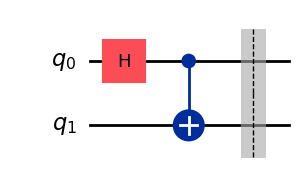

In [36]:
Bell.draw('mpl')